# Creating types

In [1]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 33.5 MB/s 


## Fitness

In [1]:
# minimizing fitness is built using negative weights
# maximizing fitness has positive weights

from deap import creator
from deap import base
creator.create("FitnessMin", base.Fitness, weights=(-1.0, 1.0))
creator.FitnessMin()
# deap.creator.FitnessMin(())   -->   Return a function

deap.creator.FitnessMin(())

"the weights attribute must be a tuple so that multi-objective and single objective fitnesses can be treated the same way"
 https://diigo.com/0qaz7m

## Individual

### List of Floats

"The first individual created will be a simple list containing floats"
 https://diigo.com/0qaz8c

In [ ]:
import random
from deap import creator
from deap import base
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
# toolbox.attr_float()    -> how to check your value
# 0.6028992057886329 (it can be randomize)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
toolbox.individual()

[0.10890805015742333,
 0.8869245933123515,
 0.8760217972748464,
 0.6898649210976232,
 0.6862175689970367,
 0.2481726497805654,
 0.26657623451651047,
 0.42791715416251874,
 0.14926392195085325,
 0.5823281112977742]

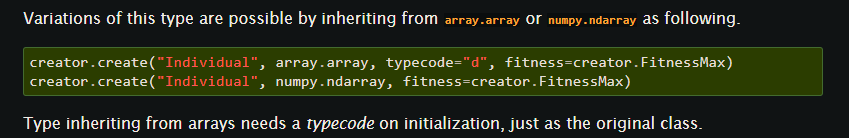

### Permutation

"An individual for the permutation representation is almost similar to the general list individual. In fact they both inherit from the basic list type"
 https://diigo.com/0qazc1

In [1]:
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

IND_SIZE = 10

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
# toolbox.indices()
# [5, 8, 7, 3, 9, 6, 4, 0, 1, 2] -> random array from IND_SIZE
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
# toolbox.individual()
# [0, 3, 2, 4, 6, 1, 9, 8, 7, 5] -> It's a list that we get from toolbox.individual()

[5, 8, 7, 3, 9, 6, 4, 0, 1, 2]

### Arithmetic

"PrimitiveSet must be defined containing all possible mathematical operators that our individual can use."
 https://diigo.com/0qb1iv

 the individual is initialized using the initIterate() function to give the complete generated iterable to the individual class.

In [1]:
import operator

from deap import base
from deap import creator
from deap import gp
from deap import tools

pset = gp.PrimitiveSet("Main", arity=1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
# pset
# <deap.gp.PrimitiveSet at 0x7fecdba784d0> -> memory allocation

creator.create("FitnessMin", base.Fitness, weights=(-1,0,))
# creator.FitnessMin()
# deap.creator.FitnessMin(()) -> It's a class that we made

creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin, pset=pset)
# creator.Individual() -> error

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_ = 2)
# toolbox.expr()    -> run this if you want to know about memory allocation and class.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.individual()

### Expression

### Evolution Strategy

In [ ]:
import numpy as np
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0),)
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", np.ndarray)

def initES(icls, scls, size, imin, imax, smin, smax):
  ind = icls(random.uniform(imin, imax) for _ in range(size))
  ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
  return ind

IND_SIZE = 10
MIN_VALUE, MAX_VALUE = -5., 5.
MIN_START, MAX_START = -1., 1.

toolbox = base.Toolbox()
toolbox.register("individual", initES, creator.Individual)

In [2]:
# for _ in range(5):
  # print("I \n")

### Particle

In [1]:
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=None, smin=None, smax=None, best=None)

def initParticle(pcls, size, pmin, pmax, smin, smax):
  part = pcls(random.uniform(pmin, pmax) for _ in range(size))
  part.speed = [random.uniform(smin, smax) for _ in range(size)]
  part.smin = smin
  part.smax = smax
  return part

toolbox = base.Toolbox()
toolbox.register("particle", initParticle, creator.Particle, size=2, pmin=-6, pmax=6, smin=-3, smax=3)
toolbox.particle()

[5.989451389424161, 0.9120146919333365]

### A Fungky One

In [1]:
import random
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

INT_MIN, INT_MAX = 5, 10
FLT_MIN, FLT_MAX = -0.2, 0.8
N_CYCLES = 4

toolbox.register("attr_int", random.randint, INT_MIN, INT_MAX)
toolbox.register("attr_flt", random.uniform, FLT_MIN, FLT_MAX)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int, toolbox.attr_flt), n=N_CYCLES)

In [2]:
toolbox.individual()

[7,
 -0.14357257049563749,
 8,
 -0.0016218300503318406,
 5,
 0.03573055243957929,
 6,
 0.30768611881424063]

## Population

### Bag

### Grid